In [30]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pydot
import numpy as np

In [2]:

(x_train,_),(x_test,_)=tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train=x_train.reshape(x_train.shape[0],-1) # -1 automatically cacluate dims =28x28 final is 60000x784

In [6]:
x_test=x_test.reshape(x_test.shape[0],-1)

In [7]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [8]:
x_train=tf.cast(x_train,tf.float32)/255 #由于图像像素是0-255的值，归一化需要将他们放到0-1这个范围内
x_test=tf.cast(x_test,tf.float32)/255

In [9]:
factor=0.5 #噪声系数

In [10]:
x_train_noise=x_train+factor*np.random.normal(size=x_train.shape)# 需要和x_train形状相同,但是带来了问题，所有像素点都在0-1范围，
#这样处理会让很多像素点超出1

In [11]:
x_test_noise=x_test+factor*np.random.normal(size=x_test.shape)# 需要和x_train形状相同

In [12]:
x_train_noise=np.clip(x_train_noise,0.,1.)# 最小值0，最大值1，因为是float 所以0.，1.
x_test_noise=np.clip(x_test_noise,0.,1.)# 最小值0，最大值1，因为是float 所以0.，1.

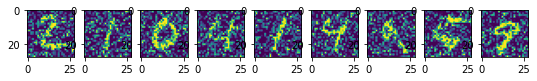

In [13]:
n=10
plt.figure(figsize=(10,2))
for i in range(1,n):
    plt.subplot(1,n,i)#1行子图
    plt.imshow(x_test_noise[i].reshape(28,28))# 之前是784 reshape成28x28
    

In [14]:
input_size=784
hidden_size=32
output_size=784

In [15]:
input=tf.keras.layers.Input(shape=(input_size,))# keras deepLearning API
#encode
en=tf.keras.layers.Dense(hidden_size,activation='relu')(input)# Dense-全连 input 输入变成encode
#decode 还原回784
de=tf.keras.layers.Dense(output_size,activation='sigmoid')(en)# Dense-全连 encode 输入变成decode 由于输入的时候归一化了，输出得用sigmoid
#把范围变回0-1之间
model=tf.keras.Model(inputs=input,outputs=de)


In [16]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


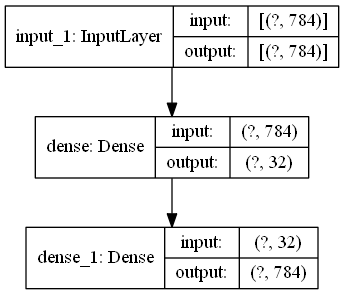

In [17]:
tf.keras.utils.plot_model(model,show_shapes=True)# 画出模型结构

In [18]:
model.compile(optimizer='adam',
loss='mse'#mean squre error 输入输出误差越小越好
)

In [19]:
model.fit(x_train_noise,x_train,
          epochs=50,
          batch_size=256,
          shuffle=True,
          validation_data=(x_test_noise,x_test)
         )#由于自编码 输入输出一样，故x_train,x_train
#输入是噪声，输出是完好

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0752 - val_loss: 0.0528
Epoch 2/50
60000/60000 [==============================] - 0s 8us/sample - loss: 0.0437 - val_loss: 0.0383
Epoch 3/50
60000/60000 [==============================] - 0s 8us/sample - loss: 0.0359 - val_loss: 0.0328
Epoch 4/50
60000/60000 [==============================] - 0s 8us/sample - loss: 0.0312 - val_loss: 0.0291
Epoch 5/50
60000/60000 [==============================] - 0s 8us/sample - loss: 0.0281 - val_loss: 0.0265
Epoch 6/50
60000/60000 [==============================] - 0s 8us/sample - loss: 0.0259 - val_loss: 0.0247
Epoch 7/50
60000/60000 [==============================] - 0s 8us/sample - loss: 0.0244 - val_loss: 0.0235
Epoch 8/50
60000/60000 [==============================] - 0s 8us/sample - loss: 0.0233 - val_loss: 0.0227
Epoch 9/50
60000/60000 [==============================] - 0s 8us/sample - loss: 0.0227 - val_loss: 0.

In [20]:
encode=tf.keras.Model(inputs=input,outputs=en)

In [21]:
input_de=tf.keras.layers.Input(shape=(hidden_size,))
output_de=model.layers[-1](input_de)#由于最后一层输出，所以【-1】
decode=tf.keras.Model(inputs=input_de,outputs=output_de)

In [22]:
encode_test=encode(x_test_noise)

In [23]:
encode_test.shape

TensorShape([10000, 32])

In [24]:
x_test.shape

TensorShape([10000, 784])

In [25]:
decode_test=decode(encode_test)

In [26]:
decode_test.shape

TensorShape([10000, 784])

In [27]:
decode_test=decode.predict(encode_test)# 用predict 数据格式变成ndaarry

In [28]:
type(decode_test)

numpy.ndarray

In [31]:
x_test=x_test.numpy()#x_test 之前变成ts格式 需要变回numpy才能画图

In [32]:
n=10# 画前十个图


In [33]:
plt.figure(figsize=(30,10))# 一个画板

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

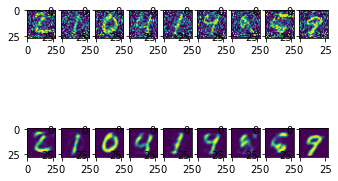

In [34]:

for i in range(1,n):
    ax=plt.subplot(2,n,i)#画两个子图
    plt.imshow(x_test_noise[i].reshape(28,28))# 之前是784 reshape成28x28
    ax=plt.subplot(2,n,i+n)# 2列一行n个从第n+1开始第二列
    plt.imshow(decode_test[i].reshape(28,28))